In [3]:
import networkx as nx
from networkx.generators.random_graphs import erdos_renyi_graph
from networkx.generators.directed import scale_free_graph
import matplotlib.pyplot as plt
from networkx import kamada_kawai_layout

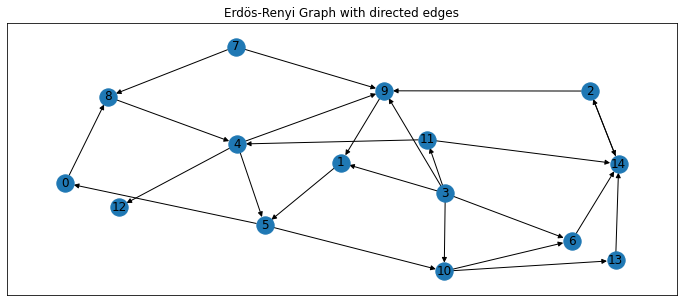

In [7]:
g1 = erdos_renyi_graph(15, 0.15, directed=True)
plt.figure(figsize=(12, 5))
nx.draw_networkx(g1, pos=kamada_kawai_layout(g1))
plt.title("Erdös-Renyi Graph with directed edges")
plt.show()

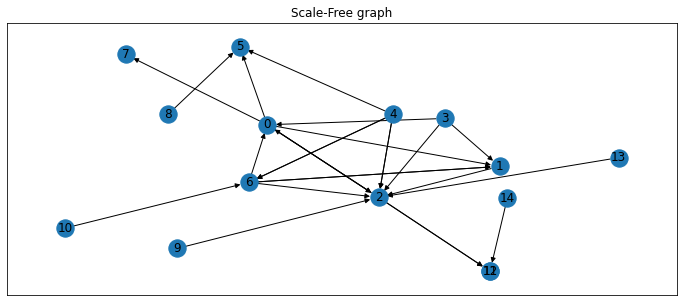

In [19]:
g2 = scale_free_graph(15)
g2.remove_edges_from(list(nx.selfloop_edges(g2)))
plt.figure(figsize=(12, 5))
nx.draw_networkx(g2, pos=kamada_kawai_layout(g2))
plt.title("Scale-Free graph")
plt.show()

In [20]:
import networkx as nx
import numpy as np
import torch

from scripts.dataset import concatenate_graph_dataset
from scripts.dataset import generate_graph_dataset
from scripts.dataset import load_concatenated_graph_dataset
from scripts.dataset import PageRankDataset
from scripts.functions import generate_erdos_graph
from scripts.functions import generate_scale_free_graph
from scripts.functions import plot_graph
from scripts.functions import override_torch_gnn_library
from scripts.graph_networks import PageRankModelingWithGNN
from scripts.page_rank import page_rank
from scripts.random_graph_generator import Random_Graph_Generator

%matplotlib inline

Using backend: pytorch


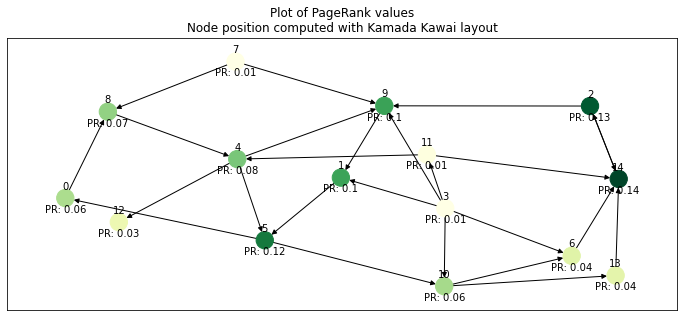

In [21]:
plot_graph(g1)

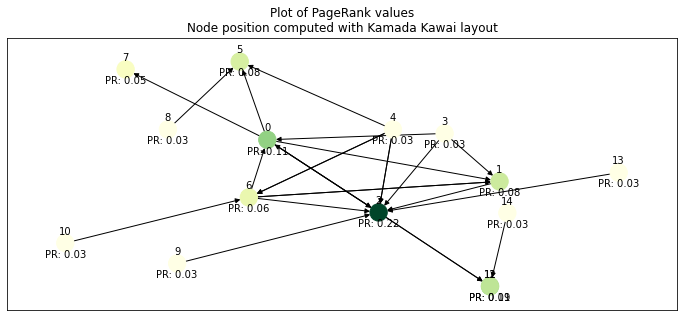

In [22]:
plot_graph(g2)

In [112]:
M = np.array([
    [0, 0, 0, 0, 1],
    [0.5, 0, 0, 0, 0],
    [0.5, 0, 0, 0, 0],
    [0, 1, 0.5, 0, 0],
    [0, 0, 0.5, 1, 0]
])

page_rank(M, print_convergence=True)

PageRank converged at iteration 47 with epsilon=1e-05.


array([[0.25418917],
       [0.13802969],
       [0.13802969],
       [0.20599289],
       [0.26375857]])

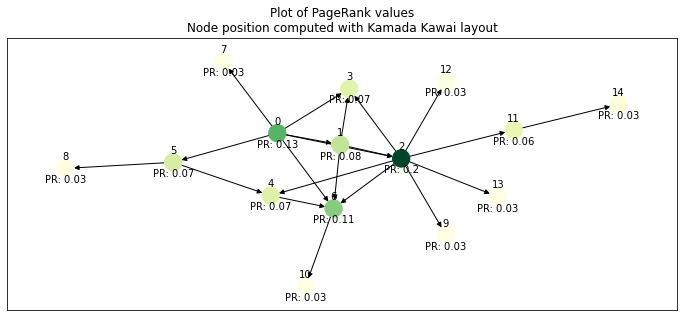

In [113]:
g = nx.Graph()
g.add_edges_from(list(g2.edges()))
plot_graph(g)

In [110]:
print("Transition matrix M:\n", np.round(M, 1))

Transition matrix M:
 [[0.  0.  0.  0.  1. ]
 [0.5 0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0. ]
 [0.  1.  0.5 0.  0. ]
 [0.  0.  0.5 1.  0. ]]


In [111]:
page_rank(M, print_convergence=True)

PageRank converged at iteration 45 with epsilon=1e-05.


array([[0.25419183],
       [0.13803392],
       [0.13803392],
       [0.20598951],
       [0.26375082]])